In [238]:
import os
from os.path import join as oj
import sys, time
sys.path.insert(1, oj(sys.path[0], '..'))  # insert parent path
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from copy import deepcopy
import pickle as pkl
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_validate, ShuffleSplit, train_test_split
import pandas as pd
import data_pecarn 
import data_psrc
import data
from collections import Counter
plt.style.use('dark_background')
# sns.set(style="white")
%matplotlib inline
%load_ext autoreload
%autoreload 2
NUM_PATIENTS = 12044

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [240]:
dummy = False
df_pecarn = data_pecarn.get_data(use_processed=False,
                                 frac_missing_allowed=0.1,
                                 dummy=dummy)
all_feats_pecarn, filtered_feats_pecarn = data.get_feat_names(df_pecarn)
df_psrc = data_psrc.get_data(use_processed=False, dummy=dummy)
all_feats_psrc, filtered_feats_psrc = data.get_feat_names(df_psrc)

computing pecarn preprocessing...
computing psrc preprocessing...


In [243]:
outcome_def = 'iai_intervention' # output
common_feats = list(filtered_feats_pecarn.intersection(filtered_feats_psrc))
common_feats = common_feats + [outcome_def, 'cv_fold', 'dset']
print(common_feats, len(common_feats))

['DecrBreathSound', 'AbdTrauma', 'GCSScore', 'AbdTenderDegree', 'Age', 'InitSysBPRange', 'SeatBeltSign', 'AbdDistention', 'Race', 'LtCostalTender', 'RecodedMOI', 'InitHeartRate', 'ThoracicTrauma', 'VomitWretch', 'RtCostalTender', 'AbdomenPain', 'iai_intervention', 'cv_fold', 'dset'] 19


**look at resulting feats**

In [225]:
filtered_feats_pecarn.intersection(filtered_feats_psrc)

{'AbdDistention_no',
 'AbdDistention_unknown',
 'AbdDistention_yes',
 'AbdTenderDegree_Mild',
 'AbdTenderDegree_Moderate',
 'AbdTenderDegree_Severe',
 'AbdTenderDegree_unknown',
 'AbdTrauma_no',
 'AbdTrauma_yes',
 'AbdomenPain_no',
 'AbdomenPain_yes',
 'Age',
 'DecrBreathSound_no',
 'DecrBreathSound_yes',
 'GCSScore',
 'InitHeartRate',
 'InitSysBPRange',
 'LtCostalTender',
 'Race_American Indian or Alaska Native',
 'Race_Asian',
 'Race_Black or African American',
 'Race_White',
 'RecodedMOI_Bike collision/fall',
 'RecodedMOI_Fall from an elevation',
 'RecodedMOI_Motor vehicle collision',
 'RecodedMOI_Motorcycle/ATV/Scooter collision',
 'RecodedMOI_Object struck abdomen',
 'RecodedMOI_Pedestrian/bicyclist struck by moving vehicle',
 'RecodedMOI_unknown',
 'RtCostalTender',
 'SeatBeltSign_no',
 'SeatBeltSign_yes',
 'ThoracicTrauma_no',
 'ThoracicTrauma_yes',
 'VomitWretch_no',
 'VomitWretch_unknown',
 'VomitWretch_yes'}

In [196]:
print('psrc but not pecarn')
filtered_feats_psrc.difference(filtered_feats_pecarn)

psrc but not pecarn


{'Race_Native Hawaiian or other Pacific Islander', 'Race_nan'}

In [197]:
print('pecarn but not psrc')
filtered_feats_pecarn.difference(filtered_feats_psrc)

pecarn but not psrc


{'AbdTrauma_or_SeatBeltSign_False',
 'AbdTrauma_or_SeatBeltSign_True',
 'AbdTrauma_unknown',
 'AbdomenPain_other',
 'AbdomenPain_unknown',
 'CostalTender',
 'DecrBreathSound_unknown',
 'DistractingPain_no',
 'DistractingPain_unknown',
 'DistractingPain_yes',
 'OTHER_RACE_Ethnicity Recorded in Other Race',
 'OTHER_RACE_Mixed Race',
 'OTHER_RACE_Physician Did Not Answer Race and Ethinicity',
 'OTHER_RACE_Race and ethnicity not indicated y physician',
 'Race_Native Hawaiian or Other Pacific Islander',
 'Race_Other',
 'Race_Stated as unknown',
 'RecodedMOI_Fall down stairs',
 'SeatBeltSign_unknown',
 'ThoracicTender_no',
 'ThoracicTender_unknown',
 'ThoracicTender_yes',
 'ThoracicTrauma_unknown'}

# look for feat shift

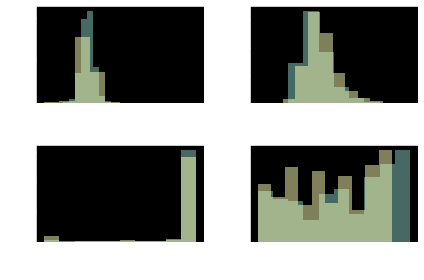

In [239]:
R, C, = 2, 2
feats = ['InitSysBPRange', 'InitHeartRate', 'GCSScore', 'Age']
for i in range(R * C):
    plt.subplot(R, C, i + 1)
    feat = feats[i]
    plt.hist(df_pecarn[feat], density=True, alpha=0.5, label='pecarn')
    plt.hist(df_psrc[feat], density=True, alpha=0.5, label='')
    plt.xlabel(feat)
plt.tight_layout()
plt.show()

# write csvs

In [23]:
df_pecarn.astype('object').describe().transpose().to_csv('processed/pecarn_vars.csv')
df_psrc.astype('object').describe().transpose().to_csv('processed/psrc_vars.csv')

In [117]:
common_feats = [x for x in feat_names_pecarn if x in feat_names_psrc]

In [17]:
df_psrc['Emesis post injury'].unique()

array([ 0., nan,  1.])